# Llibreries científiques en Python - pandas

## Series

Una sèrie és un vector unidimensional amb etiquetes als eixos i
dades homogènies.Repassem què impliquen cadascuna d'aquestes característiques amb uns
exemples.La sèrie ens permet representar un conjunt de dades unidimensionals,
per exemple, una llista d'enters, decimals o de cadenes de caràcters:

In [3]:
import pandas as pd
listaNumeros = [2,3,7,8]
listaNumerosAd=[3,4,5,6]

serieNum = pd.Series([2,3,4,5])
type(serieNum)

serieNum2 = pd.Series([1,1,1,1])
print(sum(listaNumeros))
print(listaNumeros + listaNumerosAd)
print(serieNum + serieNum2)

20
[2, 3, 7, 8, 3, 4, 5, 6]
0    3
1    4
2    5
3    6
dtype: int64


## DataFrames

Un dataframe és una taula bidimensional amb etiquetes als eixos
i dades potencialment heterogènies. El dataframe és l' estructura
principal de treball amb la llibreria pandas.A diferència d'una sèrie, un dataframe és bidimensional:

In [11]:
subject = [[2019,"M03", 9],[2019,"M02", 27],[2019,"M01", -2]]
print(pd.DataFrame(subject,columns=["year","subject","average"],index= ["Marc","Marc","David"]))

       year subject  average
Marc   2019     M03        9
Marc   2019     M02       27
David  2019     M01       -2


### Operacions bàsiques - DataFrame

#### Lectura sobre Fitxer

Pandas ens permet carregar les dades d'un fitxer CSV directament a un dataframe a través de la funció read_csv.

Ara carregarem les dades del fitxer [marvel-wikia-data.csv](https://github.com/fivethirtyeight/data/tree/master/comic-characters) 



In [25]:
dataMarvel = pd.read_csv("marvel-wikia-data.csv")
#dataMarvel.shape
#dataMarvel.describe()
#len(dataMarvel)
#dataMarvel.dtypes
#dataMarvel["APPEARANCES"].describe()
#print(dataMarvel["name"][69:73])
#dataMarvel.loc[[20,25],["name"]]
hombres = dataMarvel[dataMarvel.SEX == "Male Characters"]
fregonas = dataMarvel[dataMarvel["SEX"] == "Female Characters"]
#print(len(hombres))
#print(len(fregonas))
#idiotas = dataMarvel[(dataMarvel.SEX != "Male Characters") & (dataMarvel.SEX != "Female Characters")]
#print(len(idiotas))
#print(fregonas.sort_values("APPEARANCES", ascending=False)[0:3][["name","APPEARANCES"]])
#print(dataMarvel["SEX"].unique())
#print(dataMarvel["SEX"].isnull())
#print(dataMarvel[(dataMarvel.APPEARANCES > 2000) & (dataMarvel.ID == "Secret Identity")])
#print(dataMarvel.query('APPEARANCES > 1000 and ID == "Secret Identity"'))

#grouped = dataMarvel.groupby(["ALIGN"])
#for name,group in grouped:
    #print(name, len(group))

#grouped.agg({"APPEARANCES" : "mean"})
#print(grouped["APPEARANCES"].mean())

new_dataset = dataMarvel[["name","ID","HAIR"]][0:101]
new_dataset.to_csv("marvel-wikia-data2.csv", encoding="utf-8")



####  Estadístiques bàsiques

#### Selecció de dades

#### Agregació de dades

#### Exportar a CSV

### Visualitzacions de DataFrame

Aprofitant el dataFrame anterior realitzarme una serie de visualitzacions les quals ens ajudaran a extreure conclusions de diferents anàlisis

#### Bar chart

Pasem a analitzar els 10 personatges que més apareixen als còmics de marvel:

#### Line Bar

Com han variat les creacions dels personatges durant els anys:

#### Histograma

Veiem la distribució respecte els anys

#### Scatter plot

## ACTIVITAT

Analitzarem els incendis al brasil entre l'any 1998 i el 2007. https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil


Carregueu les dades de l'arxiu amazon.csv , que podeu trobar a la carpeta data, en un dataframe. Aquest conjunt de dades recull informació sobre el nombre d'incendis en boscos a Brasil entre el 1998 i el 2017.  Mostreu el número de files del dataframe i els noms de les columnes.

In [46]:
dataAmazon = pd.read_csv("amazon.csv")
print(dataAmazon)

      year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]


Agrupeu les dades carregades a l'exercici 1 per any i, per cada any, mostreu el nombre total d'incendis que hi va haver en tot el país.

In [84]:
totalIncendisAny= dataAmazon.groupby("year")["number"].sum()

print(totalIncendisAny)

12956158


Mostra gràficament la lína temporal del nombre d'incendis al brasil durant els darrers anys

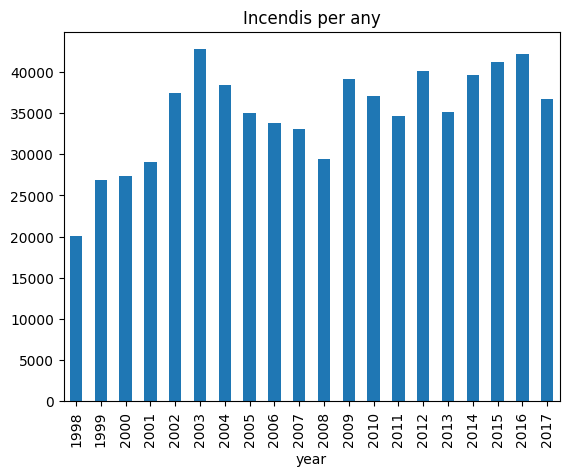

In [77]:
totalIncendisAny.plot(kind="bar")

plt.title("Incendis per any")
plt.show()

Mostreu gràficament la suma total d'incendis per mes per detectar els mesos on es produeixen més incendis per mes



In [72]:
totalIncendisMes = dataAmazon.groupby("month").sum()

print(totalIncendisMes)

              year     number
month                        
Abril      1084050  28188.770
Agosto     1084050  88050.435
Dezembro   1029591  57535.480
Fevereiro  1084050  30848.050
Janeiro    1086067  47747.844
Julho      1084050  92326.113
Junho      1084050  56010.675
Maio       1084050  34731.363
Março      1084050  30717.405
Novembro   1084050  85508.054
Outubro    1084050  88681.579
Setembro   1084050  58578.305


C:\Users\marcb\AppData\Local\Temp\ipykernel_22520\1140046894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalIncendisMes = dataAmazon.groupby("month").sum()


Mostreu també la mitja d'incendis anual, mensual i per estat

Mostreu els estats de Brasil on van enregistrar més de 800 incendis al mes, comptant els mesos de juny, juliol i agost. Heu de mostrar com a resultat una llista dels estats sense repetir.

** La funció unique us pot ser útil

Mostra  gràficament la distrbució d'incendis per estat durant els mesos de juny, juliol i agost

Volem buscar aquells estats on durant l'any 2017 van ocórrer més de 800 incendis al mes, durant qualsevol dels mesos de l'any. Heu de mostrar per pantalla l'estat, el mes (o els mesos si la condició es compleix en varis mesos) i el nombre total d'incendis enregistrats en el mes corresponent.

Creeu una còpia del dataframe original per posteriroment exportar-lo a un csv afegint una nova columna que ens indicarà per cada fila el nivell de risc d'aquella fila. Definim tres nivells de risc:
high : si s'ha enregistrat una fila amb més de 800 incendis medium : si s'ha enregistrat una fila amb un nombre d'incendis entre 400 i 800low : si s'ha enregistrat una fila amb menys de 400 incendis
Mostreu per pantalla aquelles files que corresponguin a un nivell de risc alt ( high ).